In [0]:
import pandas as pd

**We will use scikit machine learning modules to build our model so we will be importing all the required libraries**

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.features.rankd import Rank1D, Rank2D 
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
import numpy as np
from matplotlib import pyplot

sns.set(style="ticks", color_codes=True)

In [0]:
df1 = pd.read_excel('student_data.xlsx')

**To maintain the privacy of the data we will not be displaying the applicants names**

In [148]:
df1[df1.columns[5:]].head()

,Postal,Birthdate,Sex,Prog Action,Acad Plan,Descr,Appl Center,School Name,GPA (UG Overall),GPA (Last 60),GRE SQUAN (S),GRE SQUAN (P),GRE SVERB (S),GRE SVERB (P),GRE WR (S),GRE WR (P),GRE TOTAL (C),TOEFL COMPI (S),TOEFL TOTAL (C)
0,500067,1992-01-27,F,ADRV,DTSC-MS,Data Science,INTL,Jawaharlal Nehru Technical U,4,4,159,73,143,20,3.0,18,305.0,0,0
1,506002,1994-05-18,F,ADRV,DTSC-MS,Data Science,INTL,Kakatiya U,4,4,163,86,137,5,2.5,7,302.5,63,126
2,500054,1994-11-16,F,DDEF,DTSC-MS,Data Science,INTL,Jawaharlal Nehru Technical U,3.745,3.733,158,68,147,34,3.0,17,308.0,0,0
3,411036,1995-01-02,F,DENY,DTSC-MS,Data Science,INTL,U Of Pune,2.932,3.133,153,50,151,52,3.5,41,307.5,82,164
4,500091,1998-05-29,F,DDEF,DTSC-MS,Data Science,INTL,Jawaharlal Nehru Technical U,3.394,3.74,138,4,133,2,2.0,2,273.0,0,0


In [149]:
df2 = df1.copy()
df2[df2.columns[5:]].head()

,Postal,Birthdate,Sex,Prog Action,Acad Plan,Descr,Appl Center,School Name,GPA (UG Overall),GPA (Last 60),GRE SQUAN (S),GRE SQUAN (P),GRE SVERB (S),GRE SVERB (P),GRE WR (S),GRE WR (P),GRE TOTAL (C),TOEFL COMPI (S),TOEFL TOTAL (C)
0,500067,1992-01-27,F,ADRV,DTSC-MS,Data Science,INTL,Jawaharlal Nehru Technical U,4,4,159,73,143,20,3.0,18,305.0,0,0
1,506002,1994-05-18,F,ADRV,DTSC-MS,Data Science,INTL,Kakatiya U,4,4,163,86,137,5,2.5,7,302.5,63,126
2,500054,1994-11-16,F,DDEF,DTSC-MS,Data Science,INTL,Jawaharlal Nehru Technical U,3.745,3.733,158,68,147,34,3.0,17,308.0,0,0
3,411036,1995-01-02,F,DENY,DTSC-MS,Data Science,INTL,U Of Pune,2.932,3.133,153,50,151,52,3.5,41,307.5,82,164
4,500091,1998-05-29,F,DDEF,DTSC-MS,Data Science,INTL,Jawaharlal Nehru Technical U,3.394,3.74,138,4,133,2,2.0,2,273.0,0,0


**In the above table we can see that there are many unwanted categorical variables so we will delete these columns**

In [0]:
df2 = df2.drop([' Last Name', ' First Name', ' Middle Name', ' Appl Center', ' Acad Plan', ' Descr'], axis = 1)

**From the birthday we will be calculating the age of the students**

In [0]:
df2['year'] = pd.DatetimeIndex(df2[' Birthdate']).year
df2['Age'] = 2019 - df2.year

In [0]:
df2 = df2.drop([' Birthdate', 'year'], axis =1)

In [202]:
df2[df2.columns[2:]].head()

,Postal,Sex,Prog Action,School Name,GPA (UG Overall),GPA (Last 60),GRE SQUAN (S),GRE SQUAN (P),GRE SVERB (S),GRE SVERB (P),GRE WR (S),GRE WR (P),GRE TOTAL (C),TOEFL COMPI (S),TOEFL TOTAL (C),Age
0,500067,F,ADRV,Jawaharlal Nehru Technical U,4.000,4.000,159.0,73.0,143.0,20.0,3.0,18.0,305.0,86.396552,167.322034,27
1,506002,F,ADRV,Kakatiya U,4.000,4.000,163.0,86.0,137.0,5.0,2.5,7.0,302.5,63.000000,126.000000,25
2,500054,F,DDEF,Jawaharlal Nehru Technical U,3.745,3.733,158.0,68.0,147.0,34.0,3.0,17.0,308.0,86.396552,167.322034,25
3,411036,F,DENY,U Of Pune,2.932,3.133,153.0,50.0,151.0,52.0,3.5,41.0,307.5,82.000000,164.000000,24
4,500091,F,DDEF,Jawaharlal Nehru Technical U,3.394,3.740,138.0,4.0,133.0,2.0,2.0,2.0,273.0,86.396552,167.322034,21


**Removing trailing spaces from the column names**

In [0]:
df2 = df2.rename(columns=lambda x: x.strip())

In [155]:
df2.columns

Index(['Emplid', 'City', 'Postal', 'Sex', 'Prog Action', 'School Name',
       'GPA (UG Overall)', 'GPA (Last 60)', 'GRE SQUAN (S)', 'GRE SQUAN (P)',
       'GRE SVERB (S)', 'GRE SVERB (P)', 'GRE WR (S)', 'GRE WR (P)',
       'GRE TOTAL (C)', 'TOEFL COMPI (S)', 'TOEFL TOTAL (C)', 'Age'],
      dtype='object')

**converting string dtype of GPA to float dtype**

In [0]:
df2['GPA (UG Overall)'] = pd.to_numeric(df2['GPA (UG Overall)'],errors='coerce')
df2['GPA (Last 60)'] = pd.to_numeric(df2['GPA (Last 60)'],errors='coerce')

In [157]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 18 columns):
Emplid              606 non-null int64
City                606 non-null object
Postal              592 non-null object
Sex                 606 non-null object
Prog Action         606 non-null object
School Name         589 non-null object
GPA (UG Overall)    484 non-null float64
GPA (Last 60)       496 non-null float64
GRE SQUAN (S)       606 non-null int64
GRE SQUAN (P)       606 non-null int64
GRE SVERB (S)       606 non-null int64
GRE SVERB (P)       606 non-null int64
GRE WR (S)          606 non-null float64
GRE WR (P)          606 non-null int64
GRE TOTAL (C)       606 non-null float64
TOEFL COMPI (S)     606 non-null int64
TOEFL TOTAL (C)     606 non-null int64
Age                 606 non-null int64
dtypes: float64(4), int64(9), object(5)
memory usage: 85.3+ KB


**We will see distribution of GPA based on the age of applicants**

In [0]:
data = df2[['GPA (UG Overall)', 'Age']].copy()

In [0]:
data = data.groupby('Age').mean().reset_index()

In [160]:
data.head()

,Age,GPA (UG Overall)
0,20,3.659500
1,21,3.199343
2,22,3.246777
3,23,3.203128
4,24,3.283141


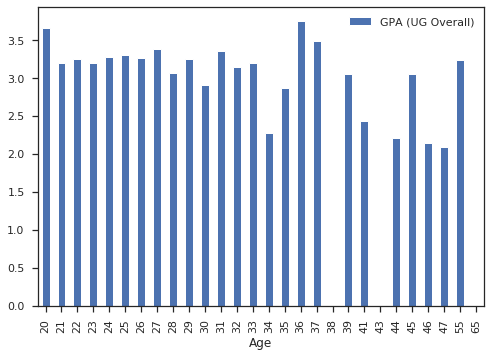

In [161]:
ax = data.plot.bar(x='Age', y='GPA (UG Overall)')

**GRE, TOEFL columns as some missing values. so will be replacing the missing values with the mean of their respactive values**

In [162]:
df2.columns

Index(['Emplid', 'City', 'Postal', 'Sex', 'Prog Action', 'School Name',
       'GPA (UG Overall)', 'GPA (Last 60)', 'GRE SQUAN (S)', 'GRE SQUAN (P)',
       'GRE SVERB (S)', 'GRE SVERB (P)', 'GRE WR (S)', 'GRE WR (P)',
       'GRE TOTAL (C)', 'TOEFL COMPI (S)', 'TOEFL TOTAL (C)', 'Age'],
      dtype='object')

In [0]:
columns = ['GPA (UG Overall)', 'GPA (Last 60)', 'GRE SQUAN (S)', 'GRE SQUAN (P)',
       'GRE SVERB (S)', 'GRE SVERB (P)', 'GRE WR (S)', 'GRE WR (P)',
       'GRE TOTAL (C)', 'TOEFL COMPI (S)', 'TOEFL TOTAL (C)']

In [0]:
for i in columns:
  df2[i]= df2[i].replace(0, np.NaN)

In [0]:
for i in columns:
  df2[i].fillna((df2[i].mean()), inplace=True)

In [166]:
df2.head()

,Emplid,City,Postal,Sex,Prog Action,School Name,GPA (UG Overall),GPA (Last 60),GRE SQUAN (S),GRE SQUAN (P),GRE SVERB (S),GRE SVERB (P),GRE WR (S),GRE WR (P),GRE TOTAL (C),TOEFL COMPI (S),TOEFL TOTAL (C),Age
0,11265010,Hyderabad,500067,F,ADRV,Jawaharlal Nehru Technical U,4.000,4.000,159.0,73.0,143.0,20.0,3.0,18.0,305.0,86.396552,167.322034,27
1,11118829,Warangal,506002,F,ADRV,Kakatiya U,4.000,4.000,163.0,86.0,137.0,5.0,2.5,7.0,302.5,63.000000,126.000000,25
2,11359693,Hyderabad,500054,F,DDEF,Jawaharlal Nehru Technical U,3.745,3.733,158.0,68.0,147.0,34.0,3.0,17.0,308.0,86.396552,167.322034,25
3,11370678,Pune,411036,F,DENY,U Of Pune,2.932,3.133,153.0,50.0,151.0,52.0,3.5,41.0,307.5,82.000000,164.000000,24
4,11340092,Hyderabad,500091,F,DDEF,Jawaharlal Nehru Technical U,3.394,3.740,138.0,4.0,133.0,2.0,2.0,2.0,273.0,86.396552,167.322034,21


**Scatter plot of GPA and GRE**

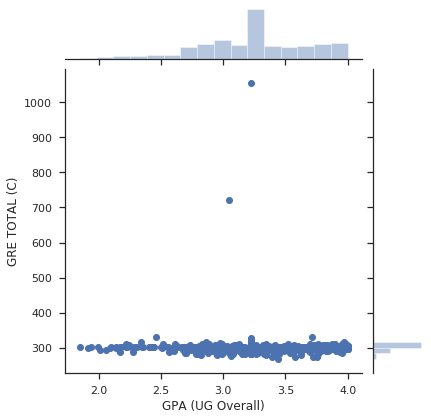

In [210]:
sns.jointplot(x='GPA (UG Overall)', y='GRE TOTAL (C)', data=df2)


**From the scatter plot we can see that the GRE is incresing as the GPOA increases**

In [168]:
df3=df2.copy()
df3.head()

,Emplid,City,Postal,Sex,Prog Action,School Name,GPA (UG Overall),GPA (Last 60),GRE SQUAN (S),GRE SQUAN (P),GRE SVERB (S),GRE SVERB (P),GRE WR (S),GRE WR (P),GRE TOTAL (C),TOEFL COMPI (S),TOEFL TOTAL (C),Age
0,11265010,Hyderabad,500067,F,ADRV,Jawaharlal Nehru Technical U,4.000,4.000,159.0,73.0,143.0,20.0,3.0,18.0,305.0,86.396552,167.322034,27
1,11118829,Warangal,506002,F,ADRV,Kakatiya U,4.000,4.000,163.0,86.0,137.0,5.0,2.5,7.0,302.5,63.000000,126.000000,25
2,11359693,Hyderabad,500054,F,DDEF,Jawaharlal Nehru Technical U,3.745,3.733,158.0,68.0,147.0,34.0,3.0,17.0,308.0,86.396552,167.322034,25
3,11370678,Pune,411036,F,DENY,U Of Pune,2.932,3.133,153.0,50.0,151.0,52.0,3.5,41.0,307.5,82.000000,164.000000,24
4,11340092,Hyderabad,500091,F,DDEF,Jawaharlal Nehru Technical U,3.394,3.740,138.0,4.0,133.0,2.0,2.0,2.0,273.0,86.396552,167.322034,21


**We will remove Gender column from our analysis to avoid gender biased admission process analysis**

In [169]:
X=df3.drop(['Emplid','Sex', 'Prog Action'], axis=1)
X.head()

,City,Postal,School Name,GPA (UG Overall),GPA (Last 60),GRE SQUAN (S),GRE SQUAN (P),GRE SVERB (S),GRE SVERB (P),GRE WR (S),GRE WR (P),GRE TOTAL (C),TOEFL COMPI (S),TOEFL TOTAL (C),Age
0,Hyderabad,500067,Jawaharlal Nehru Technical U,4.000,4.000,159.0,73.0,143.0,20.0,3.0,18.0,305.0,86.396552,167.322034,27
1,Warangal,506002,Kakatiya U,4.000,4.000,163.0,86.0,137.0,5.0,2.5,7.0,302.5,63.000000,126.000000,25
2,Hyderabad,500054,Jawaharlal Nehru Technical U,3.745,3.733,158.0,68.0,147.0,34.0,3.0,17.0,308.0,86.396552,167.322034,25
3,Pune,411036,U Of Pune,2.932,3.133,153.0,50.0,151.0,52.0,3.5,41.0,307.5,82.000000,164.000000,24
4,Hyderabad,500091,Jawaharlal Nehru Technical U,3.394,3.740,138.0,4.0,133.0,2.0,2.0,2.0,273.0,86.396552,167.322034,21


In [170]:
y=df3['Prog Action']
y.head()

0    ADRV
1    ADRV
2    DDEF
3    DENY
4    DDEF
Name: Prog Action, dtype: object

In [171]:
y.unique()

array(['ADRV', 'DDEF', 'DENY', 'WADM', 'APPL', 'DEIN', 'COND', 'ADMT',
       'WAPP', 'PEND'], dtype=object)

**We have different levels of admission acceptance so we will use dummy coding to represent this categorical data**

In [0]:
deny=['DEIN', 'DENY']

In [0]:
admit=['ADMT', 'PEND', 'APPL', 'ADRV']

In [174]:
for i in range(len(y)):
  if y[i] in deny:
    y[i]=int(0)
  elif y[i] in admit:
    y[i]=int(1)
  else:
    y[i]=int(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [175]:
y[:5]

0    1
1    1
2    2
3    0
4    2
Name: Prog Action, dtype: object

** We will be including applicants university in our analysis so to handle the categorical data we will use labelencoder**

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
enc=LabelEncoder()

In [0]:
X['School Name']= X['School Name'].astype('str')

In [0]:
X['School Name']=enc.fit_transform(X['School Name'])

In [180]:
X.head()

,City,Postal,School Name,GPA (UG Overall),GPA (Last 60),GRE SQUAN (S),GRE SQUAN (P),GRE SVERB (S),GRE SVERB (P),GRE WR (S),GRE WR (P),GRE TOTAL (C),TOEFL COMPI (S),TOEFL TOTAL (C),Age
0,Hyderabad,500067,23,4.000,4.000,159.0,73.0,143.0,20.0,3.0,18.0,305.0,86.396552,167.322034,27
1,Warangal,506002,26,4.000,4.000,163.0,86.0,137.0,5.0,2.5,7.0,302.5,63.000000,126.000000,25
2,Hyderabad,500054,23,3.745,3.733,158.0,68.0,147.0,34.0,3.0,17.0,308.0,86.396552,167.322034,25
3,Pune,411036,67,2.932,3.133,153.0,50.0,151.0,52.0,3.5,41.0,307.5,82.000000,164.000000,24
4,Hyderabad,500091,23,3.394,3.740,138.0,4.0,133.0,2.0,2.0,2.0,273.0,86.396552,167.322034,21


In [0]:
X.drop(['City', 'Postal'], axis=1, inplace=True)

In [182]:
X.head(1)

,School Name,GPA (UG Overall),GPA (Last 60),GRE SQUAN (S),GRE SQUAN (P),GRE SVERB (S),GRE SVERB (P),GRE WR (S),GRE WR (P),GRE TOTAL (C),TOEFL COMPI (S),TOEFL TOTAL (C),Age
0,23,4.0,4.0,159.0,73.0,143.0,20.0,3.0,18.0,305.0,86.396552,167.322034,27


**Once we have encoded the categorical data we will be using dummy coding to covert the data**

In [0]:
schools=X['School Name']

In [0]:
schools=pd.get_dummies(schools)

In [185]:
schools.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [186]:
X.drop(['School Name'], axis=1, inplace=True)
X.head(1)

,GPA (UG Overall),GPA (Last 60),GRE SQUAN (S),GRE SQUAN (P),GRE SVERB (S),GRE SVERB (P),GRE WR (S),GRE WR (P),GRE TOTAL (C),TOEFL COMPI (S),TOEFL TOTAL (C),Age
0,4.0,4.0,159.0,73.0,143.0,20.0,3.0,18.0,305.0,86.396552,167.322034,27


**Avoiding Dummy Trap: the index 0 has the details of every school so when we include this inour model it causes multicolinearity and overfits the model to avoid this issue we will delete this column**

In [187]:
schools=schools.drop([0], axis=1)
schools.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [188]:
X_dum=pd.concat([X, schools],axis=1)
X_dum.head()

,GPA (UG Overall),GPA (Last 60),GRE SQUAN (S),GRE SQUAN (P),GRE SVERB (S),GRE SVERB (P),GRE WR (S),GRE WR (P),GRE TOTAL (C),TOEFL COMPI (S),TOEFL TOTAL (C),Age,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,...,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82
0,4.000,4.000,159.0,73.0,143.0,20.0,3.0,18.0,305.0,86.396552,167.322034,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4.000,4.000,163.0,86.0,137.0,5.0,2.5,7.0,302.5,63.000000,126.000000,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.745,3.733,158.0,68.0,147.0,34.0,3.0,17.0,308.0,86.396552,167.322034,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.932,3.133,153.0,50.0,151.0,52.0,3.5,41.0,307.5,82.000000,164.000000,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3.394,3.740,138.0,4.0,133.0,2.0,2.0,2.0,273.0,86.396552,167.322034,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.model_selection import train_test_split

**Using sklearn library we will split the data into test and train**

In [0]:
X_train, X_test, y_train, y_test=train_test_split(X_dum, y, stratify=y, random_state=0)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
model=RandomForestClassifier(n_estimators=100, max_depth=40)

In [231]:
X_train

,GPA (UG Overall),GPA (Last 60),GRE SQUAN (S),GRE SQUAN (P),GRE SVERB (S),GRE SVERB (P),GRE WR (S),GRE WR (P),GRE TOTAL (C),TOEFL COMPI (S),TOEFL TOTAL (C),Age,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,...,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82
573,2.919000,2.688000,154.000000,54.000000,140.000000,11.000000,2.00000,2.000000,296.000000,86.396552,167.322034,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
466,3.764000,3.739000,148.000000,30.000000,132.000000,1.000000,1.50000,1.000000,281.500000,86.396552,167.322034,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
185,2.823000,2.694000,154.403974,54.403974,140.437086,16.029801,2.78125,15.131579,301.504934,86.396552,167.322034,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
580,3.226994,3.284794,154.403974,54.403974,140.437086,16.029801,2.78125,15.131579,301.504934,86.396552,167.322034,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
338,3.226994,3.284794,154.403974,54.403974,140.437086,16.029801,2.78125,15.131579,301.504934,86.396552,167.322034,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,3.226994,3.898000,154.403974,54.403974,140.437086,16.029801,2.78125,15.131579,301.504934,86.396552,167.322034,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
198,3.113000,3.142000,154.403974,54.403974,140.437086,16.029801,2.78125,15.131579,301.504934,86.396552,167.322034,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78,3.226994,3.284794,153.000000,50.000000,142.000000,17.000000,2.50000,7.000000,297.500000,86.396552,167.322034,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
62,4.000000,4.000000,160.000000,74.000000,143.000000,20.000000,3.00000,17.000000,306.000000,86.396552,167.322034,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [232]:
type(y_train.dtype)

numpy.dtype

In [0]:
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [234]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=40, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
pred=model.predict(X_test)

In [236]:
from sklearn.metrics import accuracy_score,r2_score
print(r2_score(y_test, pred), accuracy_score(y_test, pred))

0.055975794251134636 0.7039473684210527


In [237]:
pred

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 2, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 2, 0, 0, 1, 0,
       2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 2, 1, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [238]:
df_plot = pd.DataFrame({'Actual_value': y_test,
                   'predicted_value': pred})
df_plot

,Actual_value,predicted_value
567,0,0
410,2,0
512,1,1
461,2,1
97,1,1
...,...,...
208,0,0
250,1,1
554,2,1
125,0,0


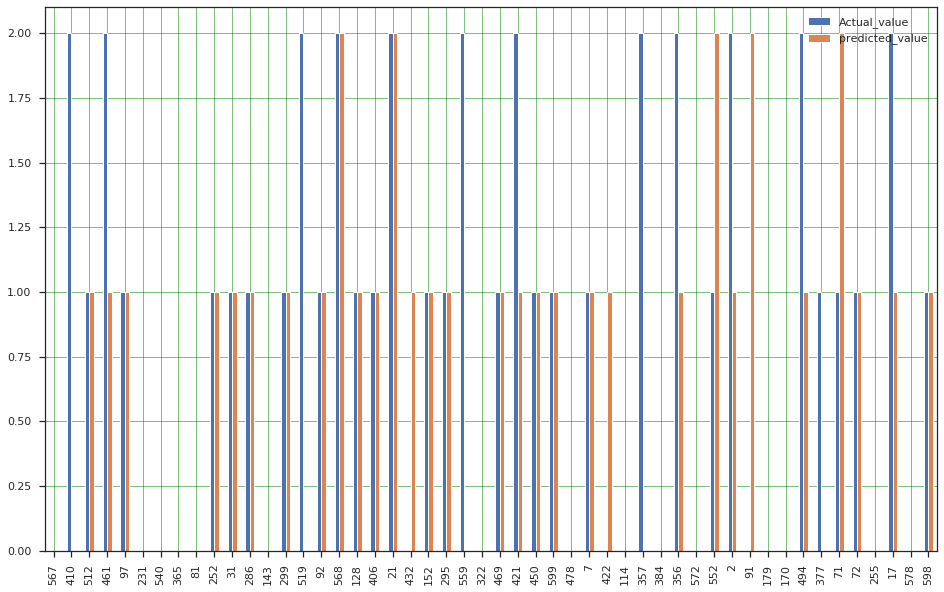

In [239]:
df4 = df_plot.head(50)
df4.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()